#Time Series Analysis with Cryptocurrency Data


#####Step1:Importing required liberies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install kaggle

In [3]:
! pip install opendatasets

#####Step2:Importing the dataset from kaggle


> Add blockquote



In [6]:
import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/olegshpagin/crypto-coins-prices-ohlcv")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Devish
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/olegshpagin/crypto-coins-prices-ohlcv


100%|██████████| 1.65G/1.65G [00:17<00:00, 102MB/s]


In [7]:

folder_path =('/content/crypto-coins-prices-ohlcv/M30/BTCUSDT_M30.csv')
df=pd.read_csv(folder_path)
df.head()

,datetime,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.32,4261.45,11.308926
1,2017-08-17 04:30:00,4280.00,4313.62,4267.99,4308.83,35.872083
2,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4320.00,21.048648
3,2017-08-17 05:30:00,4320.00,4320.00,4291.37,4315.32,2.186268
4,2017-08-17 06:00:00,4330.29,4330.29,4309.37,4311.02,3.566277


In [8]:
df.tail()

,datetime,open,high,low,close,volume
114998,2024-03-14 16:30:00,70304.75,71445.00,69880.00,71337.63,3337.16267
114999,2024-03-14 17:00:00,71337.64,71458.00,70708.14,70795.99,1602.69332
115000,2024-03-14 17:30:00,70796.00,71173.79,70700.00,71036.01,1203.03904
115001,2024-03-14 18:00:00,71036.00,71036.01,70301.10,70597.95,1553.67119
115002,2024-03-14 18:30:00,70597.96,70654.00,69309.38,70098.50,3361.30460


In [9]:
df.shape


(115003, 6)

##### Step3: Describe satatical analysing of the dataset

In [10]:
df.describe()


,open,high,low,close,volume
count,115003.000000,115003.000000,115003.000000,115003.000000,115003.000000
mean,21806.121184,21883.125086,21725.244526,21806.682145,1512.898194
std,16537.530407,16596.077427,16475.983003,16538.070016,2244.855211
min,2830.000000,2940.990000,2817.000000,2820.000000,0.000000
25%,8059.975000,8091.700000,8021.995000,8060.150000,456.234795
50%,16690.860000,16730.000000,16648.000000,16691.640000,808.786550
75%,33621.495000,33789.495000,33444.375000,33623.395000,1598.732115
max,73577.350000,73777.000000,73359.600000,73577.350000,74378.715690


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115003 entries, 0 to 115002
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  115003 non-null  object 
 1   open      115003 non-null  float64
 2   high      115003 non-null  float64
 3   low       115003 non-null  float64
 4   close     115003 non-null  float64
 5   volume    115003 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.3+ MB


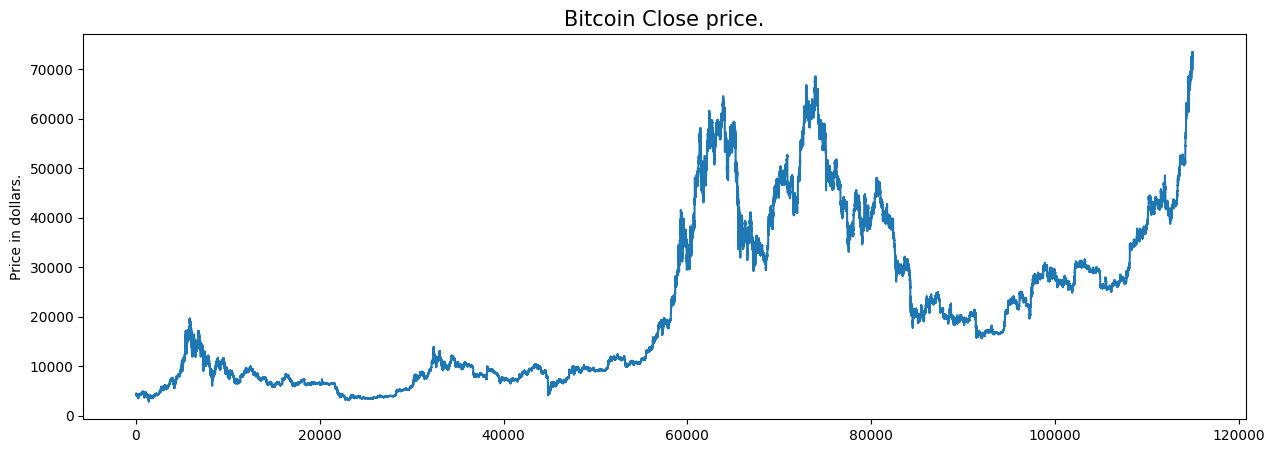

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [13]:
df.isnull().sum()


,0
datetime,0
open,0
high,0
low,0
close,0
volume,0


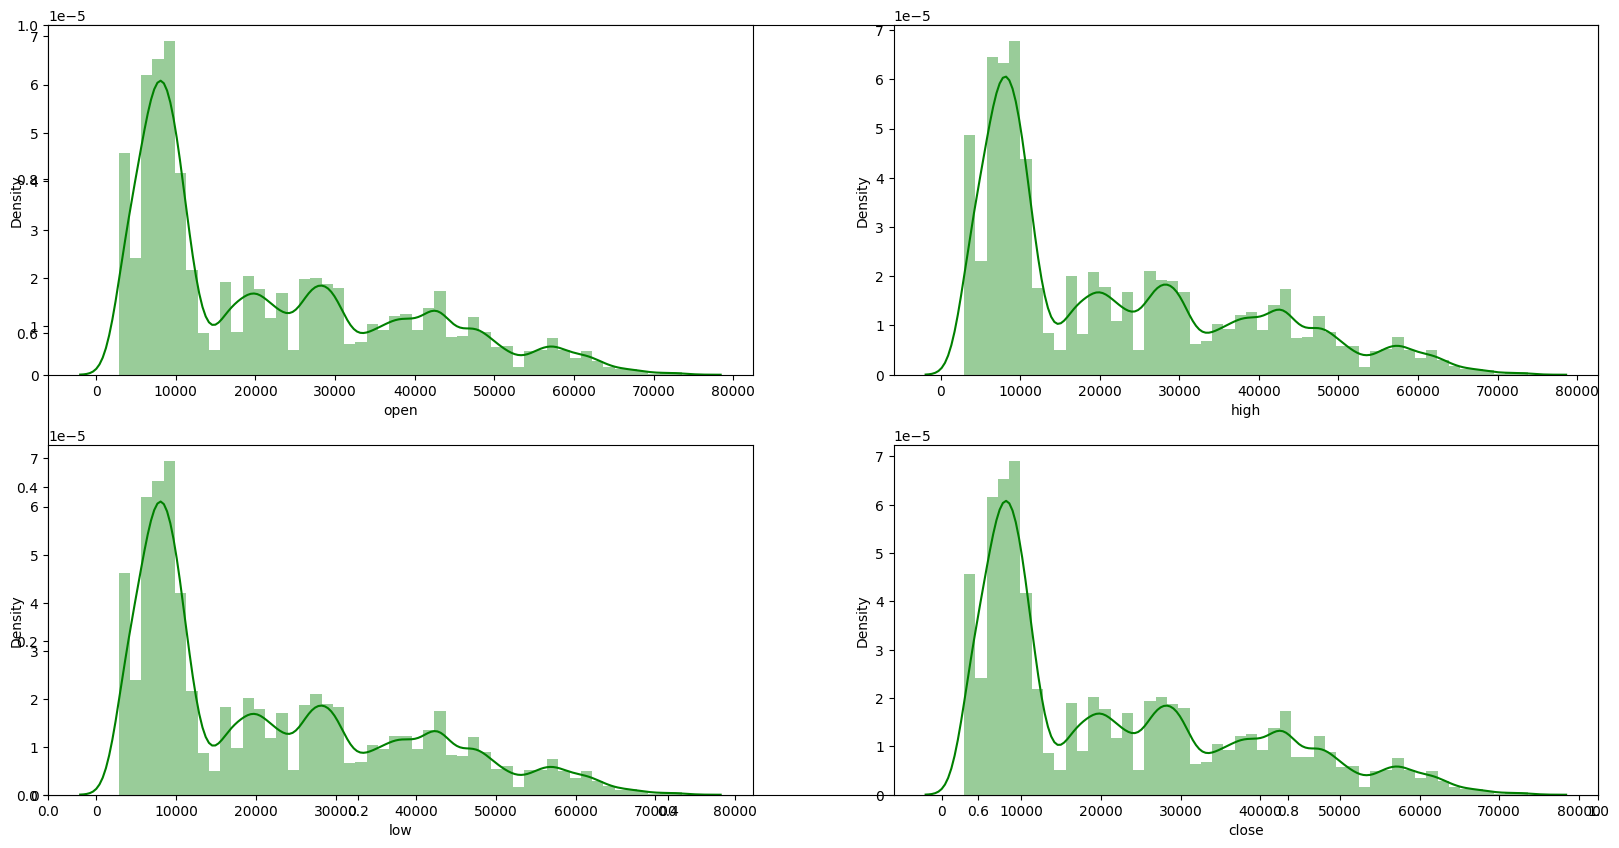

In [14]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col],color ='green')
plt.show()

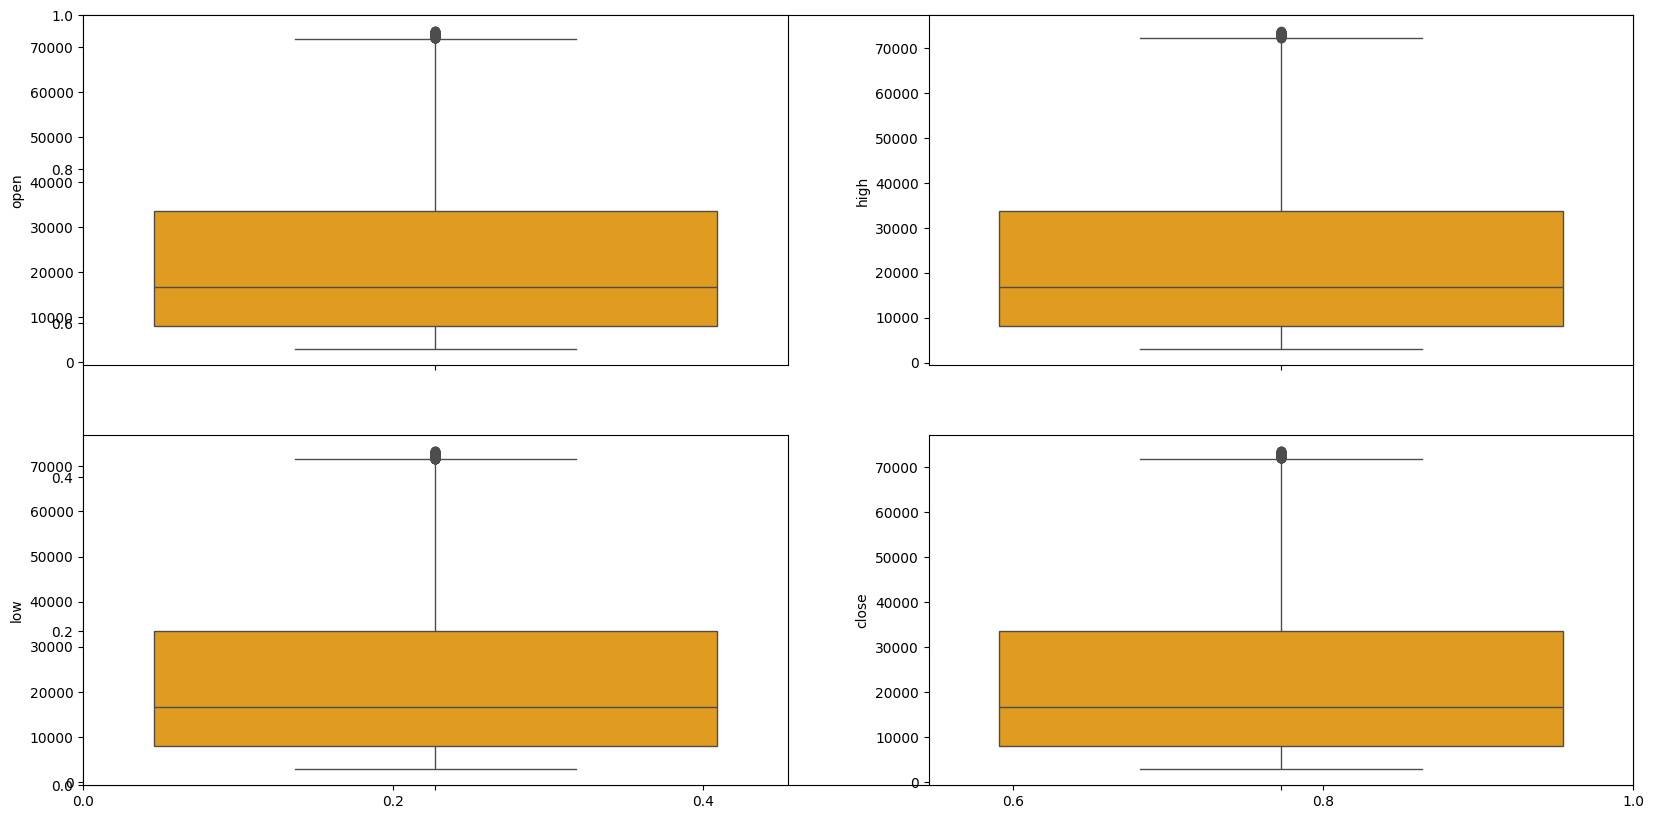

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col],color='orange')
plt.show()

In [16]:
splitted = df['datetime'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')

# Convert the 'Date' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

df.head()



,datetime,open,high,low,close,volume,year,month
0,2017-08-17 04:00:00,4261.48,4280.56,4261.32,4261.45,11.308926,2017,8
1,2017-08-17 04:30:00,4280.00,4313.62,4267.99,4308.83,35.872083,2017,8
2,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4320.00,21.048648,2017,8
3,2017-08-17 05:30:00,4320.00,4320.00,4291.37,4315.32,2.186268,2017,8
4,2017-08-17 06:00:00,4330.29,4330.29,4309.37,4311.02,3.566277,2017,8


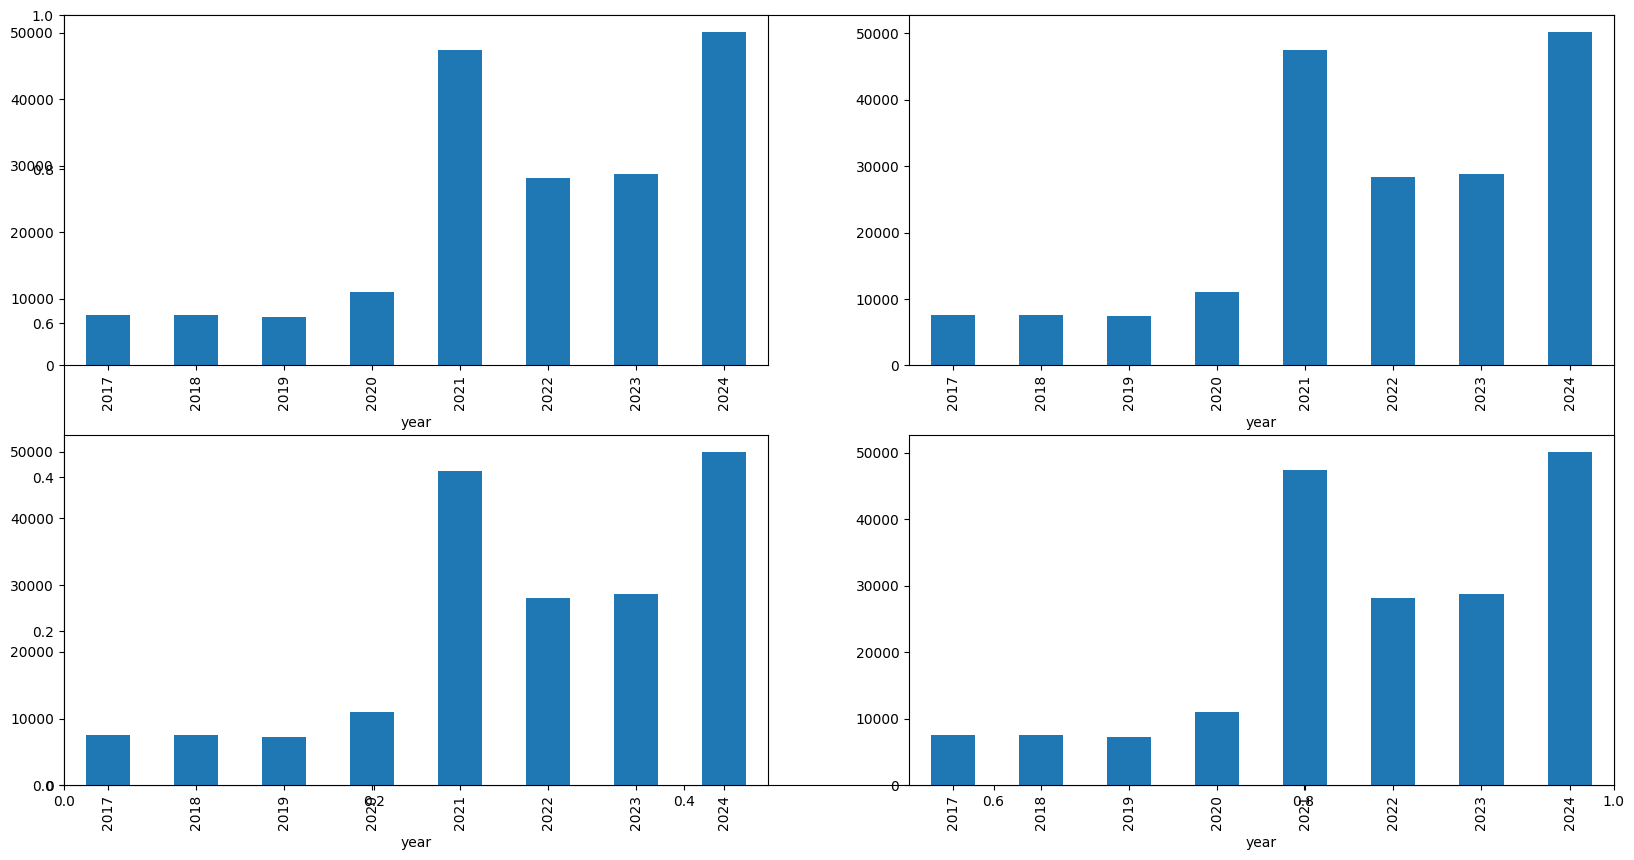

In [17]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [18]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,datetime,open,high,low,close,volume,year,month,is_quarter_end
0,2017-08-17 04:00:00,4261.48,4280.56,4261.32,4261.45,11.308926,2017,8,0
1,2017-08-17 04:30:00,4280.00,4313.62,4267.99,4308.83,35.872083,2017,8,0
2,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4320.00,21.048648,2017,8,0
3,2017-08-17 05:30:00,4320.00,4320.00,4291.37,4315.32,2.186268,2017,8,0
4,2017-08-17 06:00:00,4330.29,4330.29,4309.37,4311.02,3.566277,2017,8,0


In [19]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


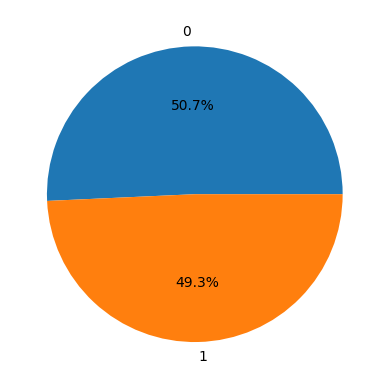

In [20]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

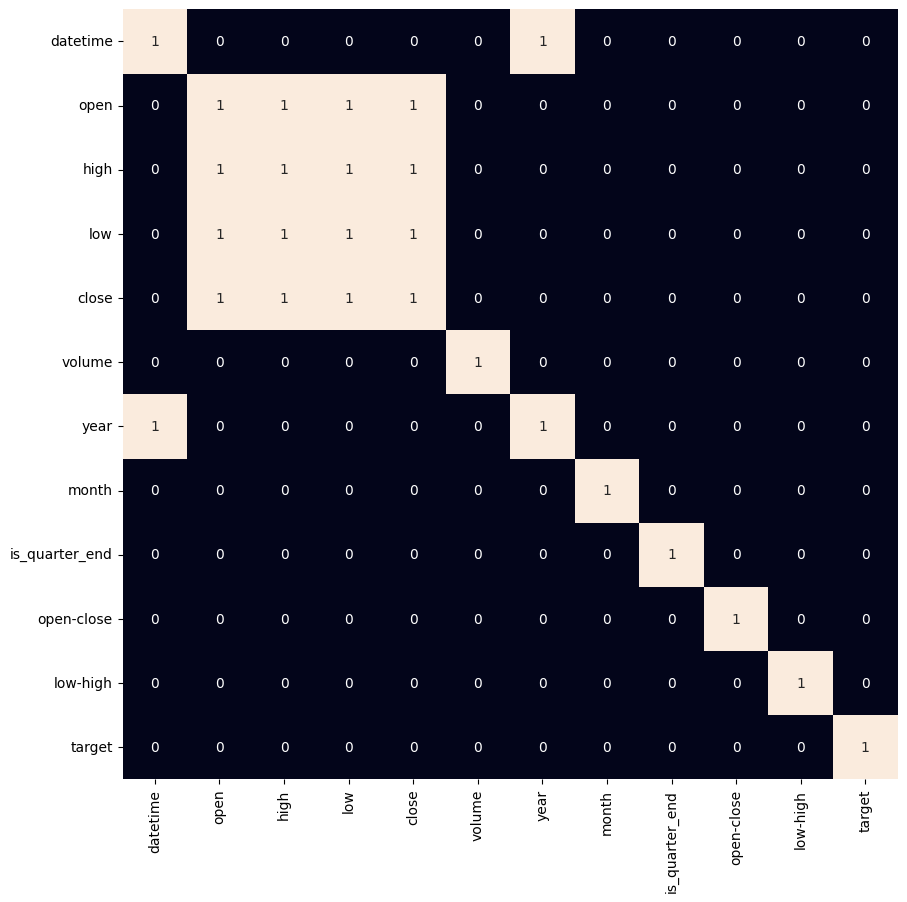

In [21]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1,random_state=2022)
print(X_train.shape, X_valid.shape)


(103502, 3) (11501, 3)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
models = [LogisticRegression(), XGBClassifier()]

for i in range(2):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5449526767724061
Validation Accuracy :  0.5438460016721458

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.6355218599724585
Validation Accuracy :  0.5448714311123157



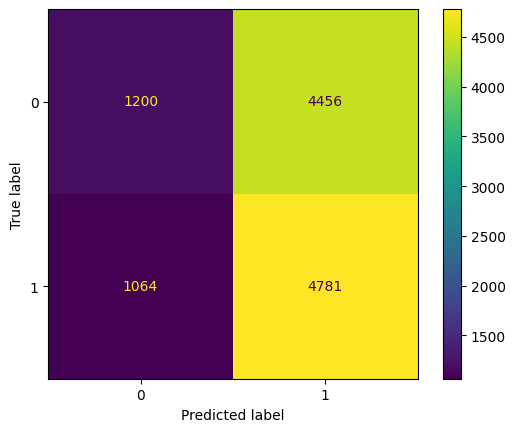

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()
